In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(1338, 7)

In [7]:
duplicate = df[df.duplicated(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
validate_dup = df[(df['age'] == 19) & (df['charges'] == 1639.5631)]
validate_dup

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
apollo_data = df.drop_duplicates()
apollo_data.shape

(1337, 7)

In [12]:
df['children'] =df['children'].astype("category")

In [13]:
df.describe(include=['object','category']).T

,count,unique,top,freq
sex,1338,2,male,676
children,1338,6,0,574
smoker,1338,2,no,1064
region,1338,4,southeast,364


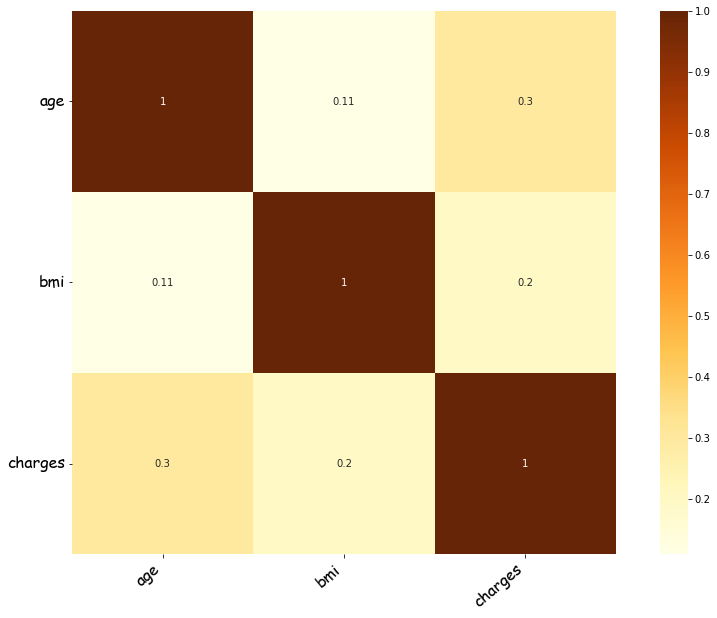

In [14]:
plt.figure(figsize = (16, 10))
ax = sns.heatmap(df.corr(),
            annot=True,cmap='YlOrBr',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

In [15]:
bins = [0,20,30,40,50,65]
labels =["0-20s","20-30s","30-40s","40-50s","Above 50s"]
df['AgeCategory'] = pd.cut(df['age'], bins,labels=labels)

In [17]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges,AgeCategory
0,19,female,27.900,0,yes,southwest,16884.92400,0-20s
1,18,male,33.770,1,no,southeast,1725.55230,0-20s
2,28,male,33.000,3,no,southeast,4449.46200,20-30s
3,33,male,22.705,0,no,northwest,21984.47061,30-40s
4,32,male,28.880,0,no,northwest,3866.85520,30-40s
5,31,female,25.740,0,no,southeast,3756.62160,30-40s
6,46,female,33.440,1,no,southeast,8240.58960,40-50s
7,37,female,27.740,3,no,northwest,7281.50560,30-40s
8,37,male,29.830,2,no,northeast,6406.41070,30-40s
9,60,female,25.840,0,no,northwest,28923.13692,Above 50s


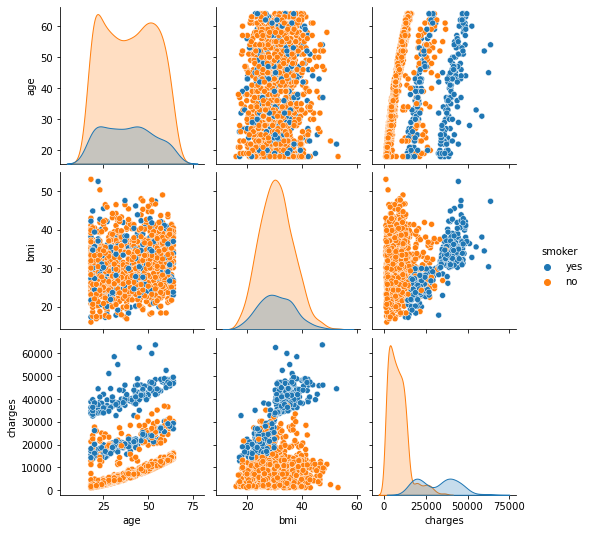

In [19]:
sns.pairplot(df,hue='smoker')

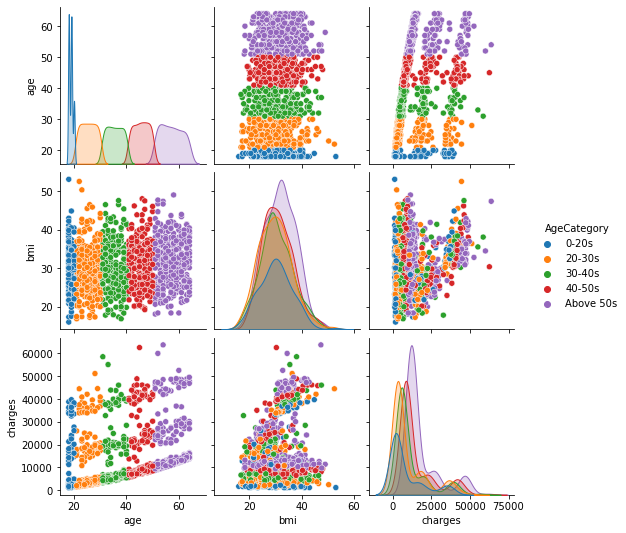

In [20]:
sns.pairplot(df,hue='AgeCategory')

In [24]:
df.groupby(['smoker'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [25]:
df.groupby(['age'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18,69.0,7086.217556,10198.459989,1121.87390,1633.044400,2198.189850,11272.331390,38792.68560
19,68.0,9747.909335,12469.537468,1241.56500,1639.563100,2135.891875,17148.980075,39722.74620
20,29.0,10159.697736,12049.624794,1391.52870,1967.022700,2459.720100,17085.267600,38344.56600
21,28.0,4730.464330,6168.059334,1515.34490,1985.288350,2254.423600,3205.349712,26018.95052
22,28.0,10012.932802,14653.363670,1664.99960,2155.351375,2641.155700,4078.134675,44501.39820
23,28.0,12419.820040,13421.332226,1815.87590,2432.780150,3594.538000,19145.024148,40904.19950
24,28.0,10648.015962,12203.650633,1969.61400,2462.839600,3045.137650,17508.424985,38126.24650
25,28.0,9838.365311,11551.289468,2137.65360,3160.320800,3750.148925,16333.214445,42112.23560
26,28.0,6133.825309,7765.729490,2302.30000,2921.320525,3388.882175,3983.464100,36085.21900


In [26]:
df.groupby(['sex'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


In [28]:
df.groupby(['children'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000
